## Import The Libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
print(tf.__version__)

2.4.1


### Creating Our Train and Test Arrays  

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [5]:
print(
    "Training Data Shape is {} ,  Its Type Is {} ,\nTest Data Shape is {} , Its Type is {} ".format(
        train_images.shape , type(train_images) , test_images.shape , type(test_images)
    )
)

Training Data Shape is (60000, 28, 28) ,  Its Type Is <class 'numpy.ndarray'> ,
Test Data Shape is (10000, 28, 28) , Its Type is <class 'numpy.ndarray'> 


## Plotting Handwritten  Numbers From This DataSet

In [6]:
def display_img(mnist_index):
    """
        this function takes the mnist image index and plotting it   
    """
    image = mnist_index
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

    

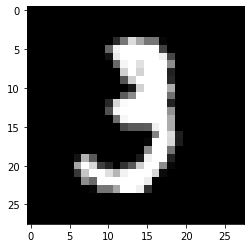

In [7]:
display_img(train_images[10])

In [8]:
train_labels[10]

3

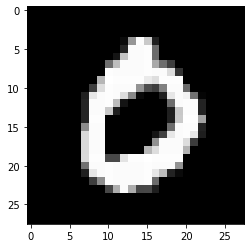

In [9]:
display_img(test_images[3])

In [10]:
test_labels[3]

0

## ReShaping Image To Small Images

In [11]:
def imaged_grid(img , row , col ):
    """
        return same input but divided in nGrid Images  
        each image with dimensions row * col
    """
    x , y = img.shape

    assert x % row == 0, "{} rows is not evenly divisble by {}".format(x, row)
    assert y % col == 0, "{} cols is not evenly divisble by {}".format(y, col)
    
    return (img.reshape ( x //row, row, -1, col)
               .swapaxes(1,2)
               .reshape(-1, row, col))
    
    
    
    

In [12]:
print(imaged_grid(test_images[2] , 7 , 7 ).shape)
imaged_grid(test_images[2] , 7 , 7 )

(16, 7, 7)


array([[[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0],
        [  0,   0,  38, 254, 109,   0,   0],
        [  0,   0,  87, 252,  82,   0,   0],
        [  0,   0, 135, 241,   0,   0,   0]],

       [[  0,   0,   0,   0,   0,   0,   0],
    

## Feature Extraction "Centroid "

In [26]:
iteration = 0

def get_centroid(img):
    
    """ 
        return feature vector for current image 
    
    """
    
    feature_vector = []
 
    for grid in imaged_grid(img , 7 , 7 ) :
        
        Xc = 0 
        Yc = 0 
        sum = 0
    
        for index, x in np.ndenumerate(grid):
          sum+= x 
          Xc += x * index[0]
          Yc += x * index[1]
        
        if sum != 0 :
            feature_vector.append( Xc/ sum )
            feature_vector.append(Yc/ sum )
        else :
             feature_vector.append(0)
             feature_vector.append(0)
        
    
    return np.array(feature_vector)

### Creating Test , Train Features 

In [14]:
print("Feature Extraction From Training Data")
train_features = [get_centroid(img)  for img in train_images  ]
print("Extraction is Done")

Feature Extraction From Training Data
Extraction is Done


In [16]:
train_features = np.array(train_features)

In [17]:
train_features.shape

(60000, 32)

In [18]:
train_features[:2]

array([[0.        , 0.        , 5.97229551, 4.6055409 , 5.71422432,
        3.13708638, 5.44336283, 0.72920354, 0.        , 0.        ,
        1.92178018, 4.10367498, 1.58336198, 1.75730492, 0.        ,
        0.41052632, 0.        , 0.        , 5.23522727, 5.36363636,
        3.24870541, 2.6051496 , 0.        , 0.        , 2.5606469 ,
        5.27493261, 1.3818144 , 2.84789846, 0.14285714, 0.60192616,
        0.        , 0.        ],
       [0.        , 0.        , 6.        , 6.        , 5.24278291,
        2.80398383, 6.        , 0.        , 0.        , 0.        ,
        3.27941463, 3.83317073, 1.65757906, 3.3998546 , 3.86559922,
        0.29354682, 3.54780876, 6.        , 3.16214896, 1.04420024,
        3.85209254, 3.71952171, 0.90250447, 0.31842576, 0.24778761,
        6.        , 0.86265329, 3.02831661, 0.20055325, 0.63070539,
        0.        , 0.        ]])

In [19]:
print("Feature Extraction From Test Data")
test_features = [get_centroid(img)  for img in test_images  ]
print("Extraction is Done")

Feature Extraction From Test Data
Extraction is Done


In [20]:
test_features = np.array(test_features)

In [21]:
test_features.shape

(10000, 32)

In [22]:
test_features[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.95442359, 6.        ,
        1.21994302, 2.92022792, 2.86991727, 3.67136068, 2.28481013,
        0.        , 0.        , 0.        , 5.91555556, 5.98666667,
        2.97017501, 2.05669214, 0.        , 0.        , 0.        ,
        0.        , 2.86841394, 4.92785734, 0.90693739, 0.1319797 ,
        0.        , 0.        ],
       [0.        , 0.        , 4.56700508, 3.56903553, 4.56971064,
        1.26719278, 0.        , 0.        , 0.        , 0.        ,
        3.72274798, 4.43778479, 1.95129284, 0.9305472 , 0.        ,
        0.        , 0.        , 0.        , 3.31512801, 3.18355314,
        5.9430019 , 2.99873338, 5.68307087, 2.30462598, 0.        ,
        0.        , 0.31214149, 3.79636711, 0.4046496 , 2.65026954,
        0.        , 1.77044025]])

## Classification Algorithms "KNN" 

In [23]:
def KNN(train_features, test_features, train_labels):
    """
        return predicted lablels to be compared with the test label
    """
    knn = KNeighborsClassifier(10, metric='euclidean')
    knn.fit(train_features, train_labels)  # fit train data
    prediction = knn.predict(test_features)  # test data
    return prediction



In [25]:
Knn_prediction = KNN(train_features, test_features , train_labels )

In [27]:
print("Accuracy Score =", accuracy_score(test_labels, Knn_prediction) * 100, "%")

Accuracy Score = 90.79 %
